#📌 Extracción

In [4]:
import pandas as pd

# URL de los datos en formato JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos en un DataFrame
datos = pd.read_json(url)

# Mostrar las primeras filas del DataFrame para verificar la carga
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

### Conociendo el Conjunto de Datos

Ahora que los datos han sido extraídos y cargados en un DataFrame, el siguiente paso es familiarizarnos con su estructura. Esto implica entender qué información contiene cada columna, los tipos de datos presentes y la forma general del dataset. Esta exploración inicial es crucial para planificar los pasos de limpieza y transformación.

#### Exploración de Columnas y Tipos de Datos

Vamos a utilizar el método `.info()` de Pandas para obtener un resumen técnico de nuestro DataFrame. `.info()` nos dará una visión general de las columnas, la cantidad de valores no nulos y el uso de memoria.

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### Primeras Observaciones

De la salida anterior, notamos algo muy importante: las columnas `customer`, `phone`, `internet`, y `account` son de tipo `object`. Al observar las primeras filas con `.head()`, vimos que contienen datos anidados, similares a un diccionario o JSON. 

Esto significa que una parte crucial de la fase de **Transformación** será "desanidar" o "normalizar" estas columnas para que cada pieza de información (como el género del cliente, si tiene servicio de teléfono, el tipo de contrato, etc.) se convierta en su propia columna en el DataFrame. La columna `Churn` parece ser nuestro objetivo principal para el análisis, indicando si un cliente ha cancelado el servicio o no.

#### Contenido del Diccionario de Datos

Para facilitar la consulta, a continuación se muestra el contenido del diccionario de datos:

```
- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente
```

#### Inspección de las Columnas Anidadas

Como se observó, cuatro columnas (`customer`, `phone`, `internet`, `account`) contienen datos anidados. Antes de transformarlos, es crucial inspeccionar su estructura para entender los campos que contienen. Analizaremos el primer registro de cada una como muestra.

In [6]:
datos["customer"][0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [7]:
datos["phone"][0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [8]:
datos["internet"][0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [9]:
datos["account"][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

#### Conclusiones de la Inspección

Esta inspección confirma que estas columnas son efectivamente diccionarios que deberán ser expandidos. Las claves de estos diccionarios (`gender`, `SeniorCitizen`, `Contract`, `PaymentMethod`, etc.) se convertirán en las nuevas columnas de nuestro DataFrame.

Todas estas variables son candidatas potenciales para analizar la evasión de clientes (`Churn`). En la fase de **Transformación**, nuestro primer paso será normalizar estos datos para poder utilizarlos en el análisis.

### 1. Normalización de Datos Anidados

Como primer paso en la transformación, vamos a "aplanar" o "normalizar" las columnas que contienen datos anidados (`customer`, `phone`, `internet`, `account`). Usaremos `pd.json_normalize` para expandir estas columnas y luego las uniremos en un único DataFrame limpio. Esto es esencial para poder analizar cada característica de forma individual.

In [10]:
# Normalizar las columnas con datos anidados
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])

# json_normalize aplana automáticamente el diccionario 'Charges'
account_df = pd.json_normalize(datos['account'])

# Unimos todos los dataframes normalizados
datos_transformados = pd.concat([
    datos[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

print("DataFrame transformado con éxito. Nuevas dimensiones:", datos_transformados.shape)
datos_transformados.head()


DataFrame transformado con éxito. Nuevas dimensiones: (7267, 21)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
datos_transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### 2. Comprobación de Incoherencias

Ahora, con el DataFrame aplanado, podemos buscar eficazmente las inconsistencias, como valores nulos, duplicados y errores de formato.

#### Búsqueda de Valores Nulos y Errores de Formato

Un problema común es que los valores faltantes no siempre están como `NaN`. A veces son cadenas vacías o espacios en blanco. La columna `Charges.Total` es un candidato para este tipo de problema, ya que es un `object` pero debería ser numérica. Vamos a investigar los registros donde `Charges.Total` parece estar vacío.

In [12]:
# Buscamos registros donde 'Charges.Total' sea un espacio en blanco
datos_transformados[datos_transformados['Charges.Total'] == ' ' ]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


#### Búsqueda de Duplicados

Verificaremos si existen filas completamente duplicadas en nuestro conjunto de datos.

In [13]:
print(f"Número de filas duplicadas: {datos_transformados.duplicated().sum()}")

Número de filas duplicadas: 0


#### Verificación de Valores Únicos en Columnas Categóricas

Usaremos el método `.unique()` para explorar los valores de las columnas categóricas clave y asegurarnos de que no haya valores inesperados (por ejemplo, 'Sí' y 'Si' para la misma categoría).

In [14]:
print('Valores únicos en Churn:', datos_transformados['Churn'].unique())
print('Valores únicos en gender:', datos_transformados['gender'].unique())
print('Valores únicos en Contract:', datos_transformados['Contract'].unique())
print('Valores únicos en PaymentMethod:', datos_transformados['PaymentMethod'].unique())
print('Valores únicos en InternetService:', datos_transformados['InternetService'].unique())

Valores únicos en Churn: ['No' 'Yes' '']
Valores únicos en gender: ['Female' 'Male']
Valores únicos en Contract: ['One year' 'Month-to-month' 'Two year']
Valores únicos en PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores únicos en InternetService: ['DSL' 'Fiber optic' 'No']


#### Resumen de Inconsistencias Encontradas

1.  **Datos Anidados**: Resuelto mediante la normalización del DataFrame.
2.  **Valores Faltantes/Incorrectos**: Se identificaron 11 filas donde `Charges.Total` es una cadena de espacio en blanco (' '). Esto impide convertir la columna a un tipo numérico y debe ser corregido.
3.  **Duplicados**: No se encontraron filas duplicadas.
4.  **Valores Categóricos**: Las columnas categóricas principales (`Churn`, `gender`, `Contract`, etc.) parecen tener valores consistentes y no muestran errores obvios de formato o duplicación semántica.

El siguiente paso será manejar las inconsistencias encontradas en la columna `Charges.Total`.

In [15]:
# Convertir la columna 'Charges.Total' a un tipo de dato numérico.
# 'coerce' convertirá los valores problemáticos (los espacios en blanco) en NaN (Not a Number).
datos_transformados['Charges.Total'] = pd.to_numeric(datos_transformados['Charges.Total'], errors='coerce')

# Rellenamos los valores nulos (NaN) con 0.
# Usamos inplace=True para que el cambio se aplique directamente sobre el DataFrame.
datos_transformados['Charges.Total'].fillna(0, inplace=True)

# Verificamos que ya no hay valores nulos en la columna
print(f"Valores nulos en 'Charges.Total' después de la corrección: {datos_transformados['Charges.Total'].isnull().sum()}")

# Verificamos que el tipo de dato de la columna ha cambiado a float
print("\nInformación del DataFrame después de la corrección:")
datos_transformados.info()


Valores nulos en 'Charges.Total' después de la corrección: 0

Información del DataFrame después de la corrección:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267

C:\Users\Axel\AppData\Local\Temp\ipykernel_20196\2994538290.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_transformados['Charges.Total'].fillna(0, inplace=True)


### 4. Creación de la Columna "Cuentas_Diarias"

Ahora que los datos están limpios, vamos a crear la columna `Cuentas_Diarias`. Utilizaremos la facturación mensual (`Charges.Monthly`) para calcular un valor diario promedio. Esto nos puede dar una perspectiva diferente sobre el gasto del cliente. Para este cálculo, asumiremos que cada mes tiene 30 días.


In [16]:

# Calculamos los cargos diarios y creamos la nueva columna
dias_mes = 30
datos_transformados['Cuentas_Diarias'] = datos_transformados['Charges.Monthly'] / dias_mes

# Mostramos el DataFrame con la nueva columna para verificar
datos_transformados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667



### 5. Estandarización y Transformación de Datos

Antes de estandarizar, hemos notado que la columna `Churn` contiene valores vacíos. Dado que es nuestra variable objetivo, las filas sin esta información no son útiles para el análisis. Por lo tanto, primero eliminaremos estas filas.


In [17]:

# Imprimimos la cantidad de datos que tenemos
print(f"Tamaño del dataset antes de la limpieza de Churn: {datos_transformados.shape}")

# Filtramos el DataFrame para quedarnos solo con las filas donde 'Churn' no es un string vacío
datos_transformados = datos_transformados[datos_transformados['Churn'] != ''].copy()

# Verificamos que los valores vacíos han sido eliminados
print(f"Valores únicos en 'Churn' después de la limpieza: {datos_transformados['Churn'].unique()}")
print(f"Tamaño del dataset después de la limpieza de Churn: {datos_transformados.shape}")

Tamaño del dataset antes de la limpieza de Churn: (7267, 22)
Valores únicos en 'Churn' después de la limpieza: ['No' 'Yes']
Tamaño del dataset después de la limpieza de Churn: (7043, 22)


Ahora que los datos están limpios, procederemos a estandarizar las columnas categóricas que tienen respuestas de tipo 'Sí' o 'No', convirtiéndolas a un formato numérico (1 para 'Yes', 0 para 'No'). Esto facilitará los cálculos y la aplicación de modelos de análisis en el futuro.


In [18]:

# Lista de columnas a estandarizar
columnas_a_estandarizar = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Diccionario para el mapeo
mapeo = {'Yes': 1, 'No': 0}

# Aplicamos el mapeo a cada columna
for columna in columnas_a_estandarizar:
    datos_transformados[columna] = datos_transformados[columna].map(mapeo)

# Verificamos los cambios mostrando el encabezado del DataFrame
print("DataFrame con columnas estandarizadas (1 = Yes, 0 = No):")
datos_transformados.head()

DataFrame con columnas estandarizadas (1 = Yes, 0 = No):


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [19]:
# Verificamos los tipos de datos para confirmar la transformación
datos_transformados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

#📊 Carga y análisis

### 1. Análisis Descriptivo

Para comenzar nuestro análisis, realizaremos un análisis descriptivo de los datos. Utilizaremos el método `.describe()` de Pandas para calcular métricas estadísticas fundamentales (como media, mediana, desviación estándar, etc.) para todas las columnas numéricas. Esto nos dará una visión general de la distribución y escala de nuestros datos.

In [20]:
datos_transformados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### 2. Distribución de Evasión (Churn)

Ahora, vamos a visualizar la distribución de nuestra variable objetivo, `Churn`. Esto nos dirá cuántos clientes han cancelado el servicio en comparación con los que han permanecido. Usaremos un gráfico de barras para ver las cantidades y un gráfico circular para ver las proporciones.

C:\Users\Axel\AppData\Local\Temp\ipykernel_20196\171439958.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No (0)', 'Sí (1)']) # Etiquetas más claras


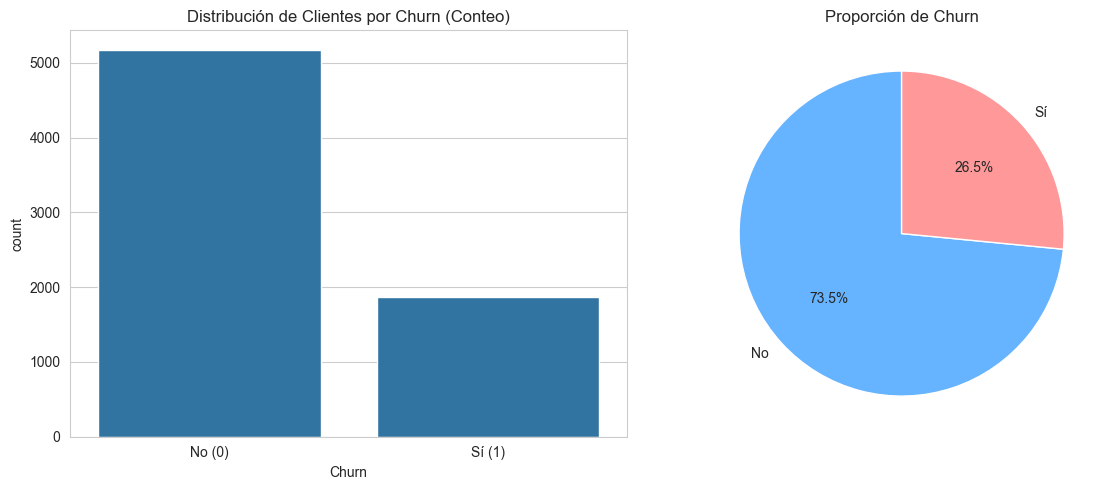

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de los gráficos
sns.set_style('whitegrid')

# Creamos la figura y los ejes para los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Barras (Conteo)
sns.countplot(x='Churn', data=datos_transformados, ax=axes[0])
axes[0].set_title('Distribución de Clientes por Churn (Conteo)')
axes[0].set_xticklabels(['No (0)', 'Sí (1)']) # Etiquetas más claras

# Gráfico Circular (Proporción)
churn_counts = datos_transformados['Churn'].value_counts()
axes[1].pie(churn_counts, labels=['No', 'Sí'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
axes[1].set_title('Proporción de Churn')
axes[1].set_ylabel('') # Eliminar la etiqueta del eje y

plt.tight_layout()
plt.show()

### 3. Recuento de Evasión por Variables Categóricas

Ahora exploraremos cómo se distribuye la evasión de clientes a través de distintas variables categóricas. Esto nos puede dar pistas importantes sobre qué factores influyen en la decisión de un cliente de cancelar el servicio. Analizaremos el tipo de contrato, el método de pago y el servicio de internet.


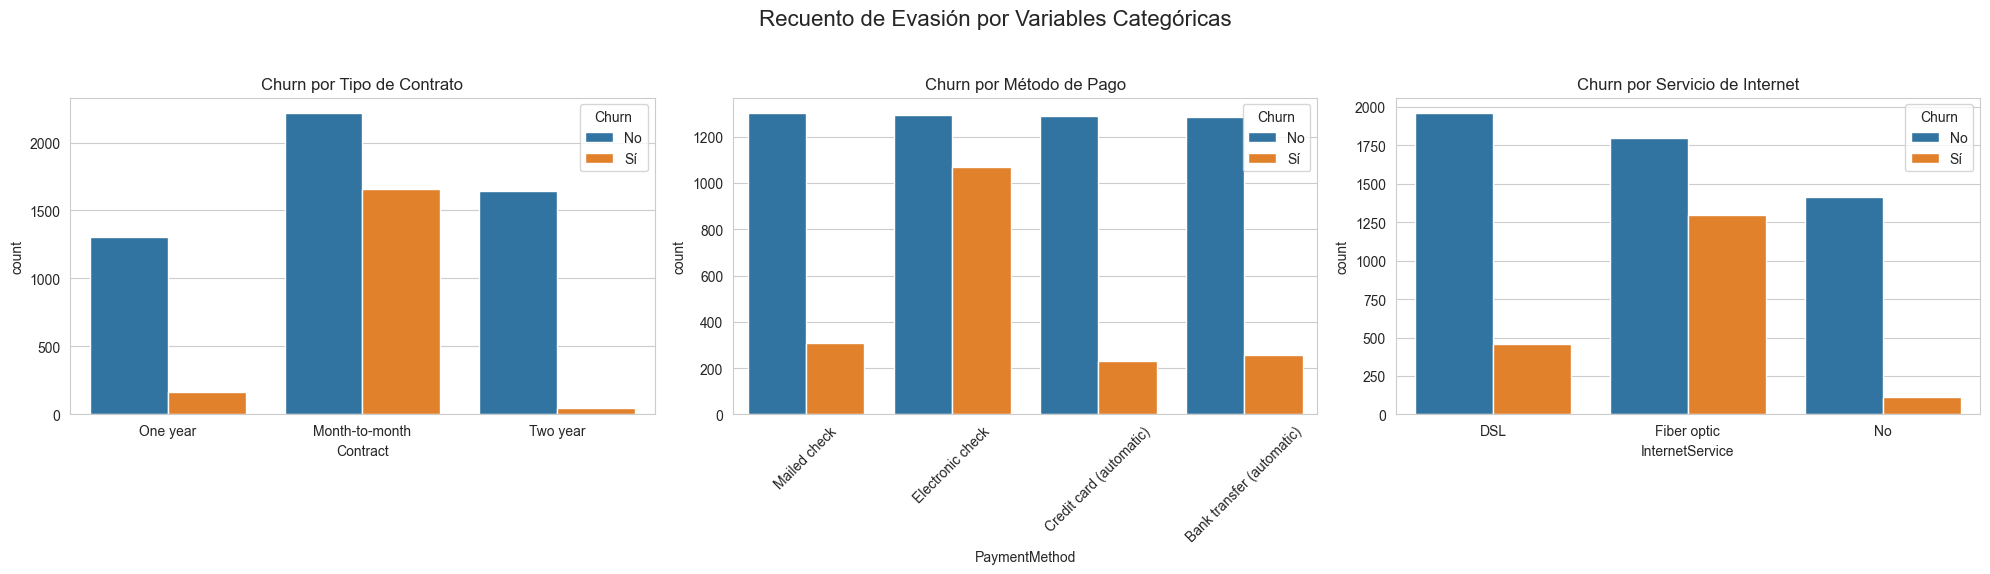

In [23]:

# Creamos una figura para los siguientes gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Recuento de Evasión por Variables Categóricas', fontsize=16)

# Gráfico 1: Churn por Tipo de Contrato
sns.countplot(x='Contract', hue='Churn', data=datos_transformados, ax=axes[0])
axes[0].set_title('Churn por Tipo de Contrato')
axes[0].legend(title='Churn', labels=['No', 'Sí'])

# Gráfico 2: Churn por Método de Pago
sns.countplot(x='PaymentMethod', hue='Churn', data=datos_transformados, ax=axes[1])
axes[1].set_title('Churn por Método de Pago')
axes[1].tick_params(axis='x', rotation=45) # Rotamos las etiquetas para que no se solapen
axes[1].legend(title='Churn', labels=['No', 'Sí'])

# Gráfico 3: Churn por Servicio de Internet
sns.countplot(x='InternetService', hue='Churn', data=datos_transformados, ax=axes[2])
axes[2].set_title('Churn por Servicio de Internet')
axes[2].legend(title='Churn', labels=['No', 'Sí'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el título principal
plt.show()


### 4. Conteo de Evasión por Variables Numéricas

Ahora, analizaremos cómo las variables numéricas se distribuyen entre los clientes que cancelaron y los que no. Usaremos diagramas de caja (boxplots) para visualizar las distribuciones de la antigüedad (`tenure`), los cargos mensuales (`Charges.Monthly`) y los cargos totales (`Charges.Total`) en función de la variable `Churn`.


C:\Users\Axel\AppData\Local\Temp\ipykernel_20196\2880112316.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No', 'Sí'])
C:\Users\Axel\AppData\Local\Temp\ipykernel_20196\2880112316.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No', 'Sí'])
C:\Users\Axel\AppData\Local\Temp\ipykernel_20196\2880112316.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['No', 'Sí'])


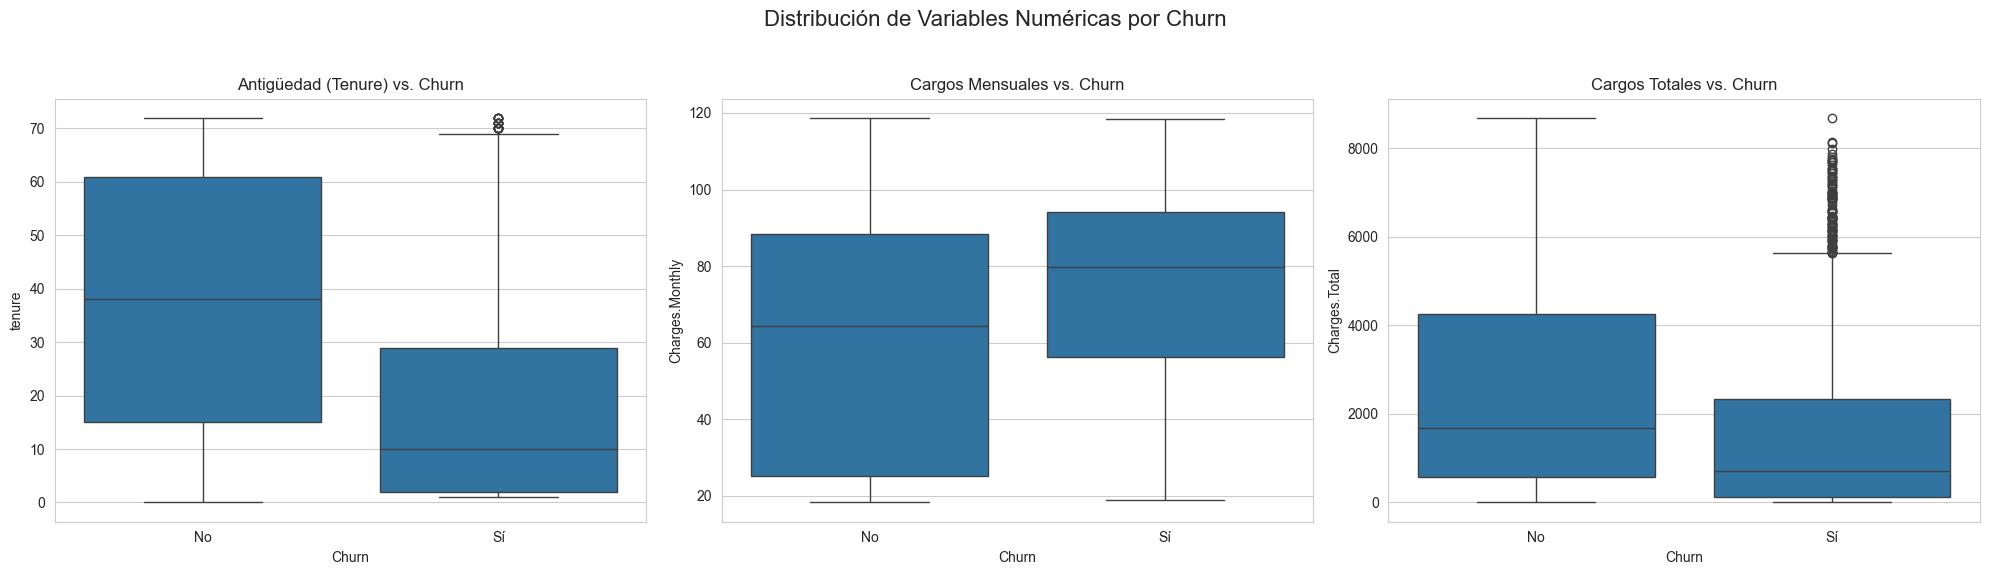

In [24]:

# Creamos una figura para los siguientes gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribución de Variables Numéricas por Churn', fontsize=16)

# Gráfico 1: Tenure vs. Churn
sns.boxplot(ax=axes[0], x='Churn', y='tenure', data=datos_transformados)
axes[0].set_title('Antigüedad (Tenure) vs. Churn')
axes[0].set_xticklabels(['No', 'Sí'])

# Gráfico 2: Cargos Mensuales vs. Churn
sns.boxplot(ax=axes[1], x='Churn', y='Charges.Monthly', data=datos_transformados)
axes[1].set_title('Cargos Mensuales vs. Churn')
axes[1].set_xticklabels(['No', 'Sí'])

# Gráfico 3: Cargos Totales vs. Churn
sns.boxplot(ax=axes[2], x='Churn', y='Charges.Total', data=datos_transformados)
axes[2].set_title('Cargos Totales vs. Churn')
axes[2].set_xticklabels(['No', 'Sí'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#📄Informe final